In [ ]:
#Fujie Wang PS4

In [16]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [18]:
income = np.loadtxt('/Users/fujie/Desktop/incomes.txt')
#pts

In [3]:
#1a

<IPython.core.display.Javascript object>


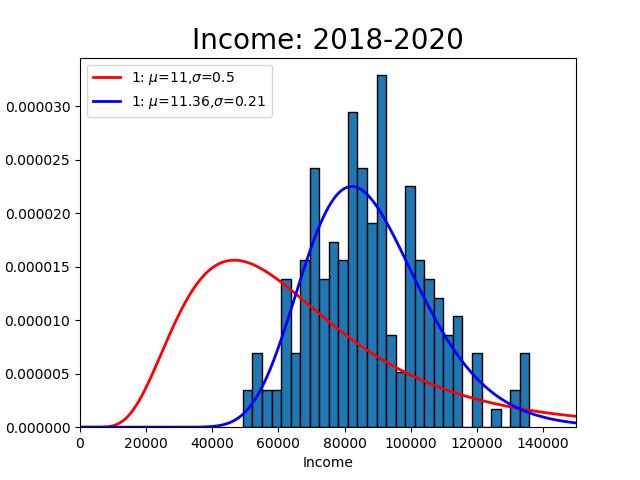

(0, 150000)

In [29]:
%matplotlib notebook
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, normed=True,
                                edgecolor='k')
plt.title('Income: 2018-2020', fontsize=20)
plt.xlabel(r'Income')
plt.ylabel(r'Percent')
plt.xlim([0,150000])

In [20]:
#1b

In [21]:
def log_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.lognorm.cdf(cut_ub, sigma, scale=np.exp(mu)) -
                       sts.lognorm.cdf(cut_lb, sigma, scale=np.exp(mu)))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu) ** 2 / (2 * sigma ** 2))) /
                    prob_notcut)
    
    return pdf_vals

In [30]:
dist1 = np.linspace(0.0001, 150000, 2000)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist1, log_norm_pdf(dist1, mu_1, sig_1,0,150000),
         linewidth=2, color='r', label='1: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')


In [23]:
def log_lik_norm(xvals,mu,sigma,cut_lb,cut_ub):
    pdf_vals = log_norm_pdf(xvals, mu, sigma,cut_lb,cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val
print('Log-likelihood 1: ', log_lik_norm(pts, mu_1, sig_1,0,150000))

Log-likelihood 1:  -2379.120591931827


In [9]:
#1c

In [24]:
def crit(params, *args):
    mu, sigma = params
    xvals,cut_lb,cut_ub = args
    log_lik_val = log_lik_norm(args[0],mu,sigma,cut_lb,cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [26]:
mu_init = 14  # mu_2
sig_init = 0.5  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = (income,0,150000)

results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
                            
mu_MLE, sig_MLE = results_uncstr.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('Log-likelihood 1: ', log_lik_norm(pts, mu_MLE, sig_MLE,0,150000))

mu_MLE= 11.361699975046553  sig_MLE= 0.2117432633594822
Log-likelihood 1:  -2240.934337511636


In [27]:
vcv_mle = results_uncstr.hess_inv

stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[0.00021925 0.00019827]
 [0.00019827 0.00019465]]
Standard error for mu estimate =  0.014807093298194612
Standard error for sigma estimate =  0.013951832070638753


In [31]:
dist1 = np.linspace(0.0001, 150000, 2000)
mu = mu_MLE
sig = sig_MLE
plt.plot(dist1, log_norm_pdf(dist1, mu, sig,0,150000),
         linewidth=2, color='b', label='1: $\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper left')

In [ ]:
#1d

In [32]:
log_lik_h0 = log_lik_norm(income, mu_1, sig_1,0,150000)
log_lik_mle = log_lik_norm(income, mu_MLE, sig_MLE,0,150000)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


In [33]:
print('it is highly unlikely that the null hypothesis is true because the p-value is too small')

it is highly unlikely that the null hypothesis is true because the p-value is too small


In [ ]:
#1e

In [34]:
print('Chance to earn more than $100k:',1-sts.lognorm.cdf(100000,sig_MLE,scale=np.exp(mu_MLE)))

Chance to earn more than $100k: 0.23755401957218636


In [35]:
print('Chance to earn less than $75k:',sts.lognorm.cdf(75000,sig_MLE,scale=np.exp(mu_MLE)))

Chance to earn less than $75k: 0.2596439225866048


In [ ]:
#2a

In [36]:
import pandas as pd
sick = pd.read_csv('/Users/fujie/Desktop/sick.txt').astype('float64')

In [37]:
def norm_pdf2(xvals,sig):
    pdf_vals = (1/(sig * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - 0)**2 / (2 * sig**2)))
    return pdf_vals

In [38]:
def log_lik_norm2(y, x1, x2, x3, b0, b1, b2, b3, sig):
    
    error = y-b0-b1*x1-b2*x2-b3*x3
    pdf_vals = norm_pdf2(error, sig)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [39]:
def crit2(params,*args):
    
    b0, b1, b2, b3, sig = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_norm2(y, x1, x2, x3, b0, b1, b2, b3, sig)
    neg_log_lik_val = -log_lik_val 
    
    return neg_log_lik_val

In [40]:
b0_init, b1_init, b2_init, b3_init, sig_init = (0.35,0,0,0,1)
y=sick['sick']
x1, x2, x3 = sick['age'], sick['children'], sick['avgtemp_winter']
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
mle_args = (y, x1, x2, x3)
results = opt.minimize(crit2, params_init,args = (mle_args))
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x
print('beta0:', b0_MLE)
print('beta1:', b1_MLE)
print('beta2:', b2_MLE)
print('beta3:', b3_MLE)
print('sigma:', sig_MLE)
print('Log-likelihood: ', log_lik_norm2(y, x1, x2, x3,b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE))

/Users/fujie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/fujie/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/fujie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/fujie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/fujie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/Users/fujie/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/fujie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarnin

beta0: 0.2516460175328529
beta1: 0.012933373512119971
beta2: 0.40050180842018207
beta3: -0.009991679634230862
sigma: 0.003017672416360942
Log-likelihood:  876.8650504047511


In [41]:
vcv_mle = results.hess_inv
print('VCV(MLE) = ', vcv_mle)

VCV(MLE) =  [[ 1.53070818e-06  9.24316316e-09 -2.56074275e-07 -3.31242149e-08
   2.39282392e-08]
 [ 9.24316316e-09  4.45676543e-09 -4.06571328e-08 -2.77826620e-09
   3.23143139e-11]
 [-2.56074275e-07 -4.06571328e-08  4.37080012e-07  2.69190693e-08
  -3.57953364e-09]
 [-3.31242149e-08 -2.77826620e-09  2.69190693e-08  2.30299604e-09
  -4.63644376e-10]
 [ 2.39282392e-08  3.23143139e-11 -3.57953364e-09 -4.63644376e-10
   2.47255734e-08]]


<IPython.core.display.Javascript object>


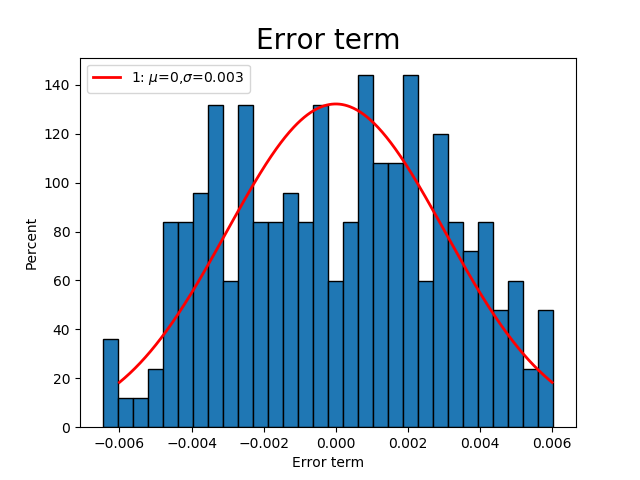

Text(0,0.5,'Percent')

In [45]:
num_bins = 30
count, bins, ignored = plt.hist(y-b0_MLE-b1_MLE*x1-b2_MLE*x2-b3_MLE*x3, num_bins, normed=True,
                                edgecolor='k')
plt.title('Error term', fontsize=20)
plt.xlabel(r'Error term')
plt.ylabel(r'Percent')

In [46]:
dist2 = np.linspace(-0.006, 0.006, 500)

plt.plot(dist2, norm_pdf2(dist2,sig_MLE),
         linewidth=2, color='r', label='1: $\mu$=0,$\sigma$=0.003')
plt.legend(loc='upper left')

In [ ]:
#2b

In [47]:
b0_t, b1_t, b2_t, b3_t, sig_t = 1, 0, 0, 0, 0.1
log_lik_h02 = log_lik_norm2(y, x1, x2, x3, b0_t, b1_t, b2_t, b3_t, sig_t)
log_lik_mle2 = log_lik_norm2(y, x1, x2, x3,b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE)
print('hypothesis value log likelihood', log_lik_h0)
print('MLE log likelihood', -results.fun)
LR_val2 = 2 * (log_lik_mle2-log_lik_h02)
print('likelihood ratio value', LR_val)
pval_h02 = 1.0 - sts.chi2.cdf(LR_val2, 5)
print('Chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2379.120591931827
MLE log likelihood 876.8650504047511
likelihood ratio value 276.3725088403826
Chi squared of H0 with 5 degrees of freedom p-value =  0.0


In [48]:
print('it is highly unlikely that the null hypothesis is true because the p-value is too small')

it is highly unlikely that the null hypothesis is true because the p-value is too small
